In [158]:
# Displays figures in line
%matplotlib inline

# Import dependencies 
import pandas as pd
import numpy as np
import csv 
import json
import tweepy
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret,access_token, access_token_secret

In [159]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [160]:
# Target news outlets
newsOutlets = ("BBC" , "CBS", "CNN", "FoxNews", "nytimes")

# Create variables for holding related information
oldestTweet = None
uniqueIDs = []
accountList = []
compoundList = []
positiveList = []
negativeList = []
neutralList = []
tweetTimes = []
tweetText = []
tweetAgo = []

            
# Loop through each news outlet
for newsOutlet in newsOutlets:
    
    # Counter to keep track of the number of tweets retrieved
    counter = 0
    
    # Loop through 5 pages of tweets totaling 100 tweets
    for x in range(1, 6):
        
        # Get all tweets from home feeds of the target news outlets
        publicTweets = api.user_timeline(newsOutlet, page=x, result_type="recent", max_ID=oldestTweet)
        #print(json.dumps(publicTweets, indent=4, sort_keys=True))
       
        # Loop through all tweets
        for tweet in publicTweets:
            
            # Run vader analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            
            # Get Vader sentiment analysis scores 
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]
            
            # Append Vader scores to correponding list
            compoundList.append(compound)
            positiveList.append(positive)
            negativeList.append(negative)
            neutralList.append(neutral)
            
            # Get tweet information 
            account = tweet["user"]["name"]
            time = tweet["created_at"]
            text = tweet["text"]
            
            # Append tweet information to corresponding list
            accountList.append(account)
            tweetTimes.append(time)
            tweetText.append(text)
            
            # Get tweet ID and append to uniqueID list.
            tweetID = tweet["id"]
            if tweetID not in uniqueIDs:
                uniqueIDs.append(tweetID)
            
            # Subtract 1 from the lowest tweet ID returned from the previous request.
            # Use this for the value of max_id.
            oldestTweet = tweetID-1
            
            # Increase counter by 1 and append to counter list
            counter += 1
            tweetAgo.append(counter)
            
            # Create a dictionary of reults
            newsOutletResults = {"News Outlet": accountList,
                                 "Tweet Text": tweetText,
                                 "Tweet Time": tweetTimes,
                                 "Compound Score": compoundList,
                                 "Positive Score": positiveList,
                                 "Neutral Score": neutralList,
                                 "Negative Score": negativeList,
                                 "Tweets Ago": tweetAgo} 
            
# Convert dictionary of results into a dataframe
newsMoodDF = pd.DataFrame(newsOutletResults)
print(newsMoodDF.head(200))

# Create csv file containing News Mood Data
newsMoodDF.to_csv("Output Files/News Mood DataFrame.csv")

     Compound Score  Negative Score  Neutral Score News Outlet  \
0            0.0000           0.000          1.000         BBC   
1            0.0000           0.000          1.000         BBC   
2            0.5994           0.000          0.692         BBC   
3            0.3612           0.000          0.884         BBC   
4            0.0000           0.000          1.000         BBC   
5            0.5719           0.000          0.829         BBC   
6           -0.2732           0.095          0.905         BBC   
7            0.5859           0.000          0.798         BBC   
8            0.5018           0.000          0.755         BBC   
9           -0.8402           0.429          0.571         BBC   
10           0.0000           0.000          1.000         BBC   
11           0.0000           0.000          1.000         BBC   
12           0.0000           0.000          1.000         BBC   
13           0.8625           0.000          0.556         BBC   
14        

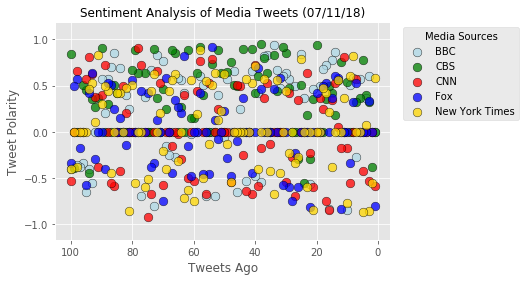

In [161]:
# Build dataframes for each news outlet
bbcDF = newsMoodDF.loc[newsMoodDF["News Outlet"]== "BBC"]
cbsDF = newsMoodDF.loc[newsMoodDF["News Outlet"]== "CBS"]
cnnDF = newsMoodDF.loc[newsMoodDF["News Outlet"]== "CNN"]
foxDF = newsMoodDF.loc[newsMoodDF["News Outlet"]== "Fox News"]
nytDF = newsMoodDF.loc[newsMoodDF["News Outlet"]== "The New York Times"]

# Build scatter plots for each news outlet
plt.scatter(bbcDF["Tweets Ago"], bbcDF["Compound Score"], s=75, facecolors="lightblue", edgecolors="black", alpha=0.75, label="BBC")
plt.scatter(cbsDF["Tweets Ago"], cbsDF["Compound Score"], s=75,facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
plt.scatter(cnnDF["Tweets Ago"], cnnDF["Compound Score"], s=75,facecolors="red", edgecolors="black", alpha=0.75, label="CNN")
plt.scatter(foxDF["Tweets Ago"], foxDF["Compound Score"], s=75,facecolors="blue", edgecolors="black", alpha=0.75, label="Fox")
plt.scatter(nytDF["Tweets Ago"], nytDF["Compound Score"], s=75,facecolors="gold", edgecolors="black", alpha=0.75, label="New York Times")

# Create a legend, chart title, grid, and label axes
plt.legend(title= "Media Sources", loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title("Sentiment Analysis of Media Tweets (07/11/18)", fontsize=12)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid(color = "white")

plt.xlim([nytDF["Tweets Ago"].max()+5, nytDF["Tweets Ago"].min()-5])
plt.ylim([nytDF["Compound Score"].min()-.3, nytDF["Compound Score"].max()+.3])

# Save Figure
plt.savefig("Output Files/Sentiment Analysis of Media Tweets.png", bbox_inches='tight')

# Show plot
plt.show()


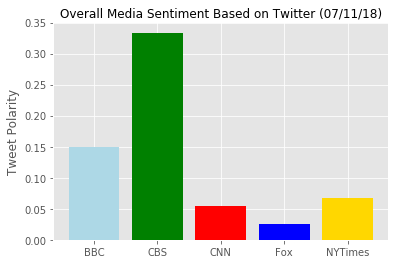

In [162]:
# Obtain overall sentiment score for each news outlet
bbcScore = bbcDF["Compound Score"].mean()
cbsScore = cbsDF["Compound Score"].mean()
cnnScore = cnnDF["Compound Score"].mean()
foxScore = foxDF["Compound Score"].mean()
nytScore = nytDF["Compound Score"].mean()

# Create list of colors
colors = ["lightblue", "green", "red", "blue", "gold"]

# Define x axis, tick mark locations and labels
xAxis = np.arange(len(overallScores))
tickLocations = [value for value in xAxis]
plt.xticks(tickLocations, ["BBC", "CBS", "CNN", "Fox", "NYTimes"])

# Plot bar chart; add title and labels
plt.bar(xAxis, overallScores, align="center", color=colors)
plt.title("Overall Media Sentiment Based on Twitter (07/11/18)", fontsize=12)
plt.ylabel("Tweet Polarity")

# Save Figure
plt.savefig("Output Files/Overall Media Sentiment Based on Twitter.png")

# Show plot
plt.show()

